In [1]:
# Machine Learning Model for 'Geld ausgegeben' prediction over other parameters of Einkaufsstatistik

# Importing the libraries

# Load numpy
import numpy as np

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler

# render plots in jupyter notebook
%matplotlib inline

In [2]:
# Importing the dependencies
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [3]:
# Importing the dataset
dataset = pd.read_csv('Preprocessed_data.csv')

In [4]:
# Modelling

# X and y arrays
X = dataset[['KaeuferID', 'Familienstand', '18-25', '26-35', '36-45', '46-50']]
y = dataset['Geld_ausgegeben']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Creating and Training the Model

# Initialising the DNN
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define a checkpoint callback
checkpoint_name = 'Weights_Deep_Neural_Network_Features_Third_Tier-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [7]:
# Train the model
NN_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split = 0.2, callbacks=callbacks_list)

Train on 320000 samples, validate on 80000 samples
Epoch 1/50
320000/320000 [==============================] - 214s 668us/step - loss: 3972.4940 - mean_absolute_error: 3972.4863 - val_loss: 3947.3209 - val_mean_absolute_error: 3947.3196

Epoch 00001: val_loss improved from inf to 3947.32091, saving model to Weights_Deep_Neural_Network_Features_Third_Tier-001--3947.32091.hdf5
Epoch 2/50
320000/320000 [==============================] - 206s 645us/step - loss: 3950.2343 - mean_absolute_error: 3950.2388 - val_loss: 3943.8690 - val_mean_absolute_error: 3943.8823

Epoch 00002: val_loss improved from 3947.32091 to 3943.86899, saving model to Weights_Deep_Neural_Network_Features_Third_Tier-002--3943.86899.hdf5
Epoch 3/50
320000/320000 [==============================] - 221s 690us/step - loss: 3942.4168 - mean_absolute_error: 3942.4253 - val_loss: 3917.5854 - val_mean_absolute_error: 3917.5920

Epoch 00003: val_loss improved from 3943.86899 to 3917.58540, saving model to Weights_Deep_Neural_Net

In [9]:
# Load weights file of the best model :
# weights_file = 'Weights_Deep_Neural_Network_Features_Third_Tier-48--18738.19831.hdf5' # choose the best checkpoint 
# NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

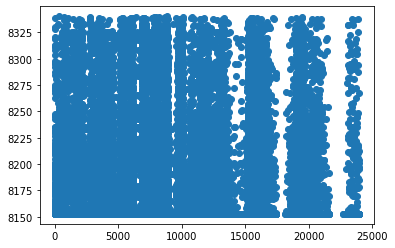

In [10]:
# Predictions from our Model
predictions = NN_model.predict(X_test)
plt.scatter(y_test,predictions)

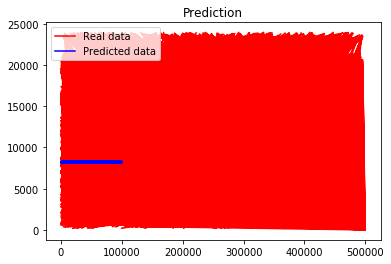

In [11]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [12]:
# sns.distplot((y_test-predictions),bins=50);

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score:', metrics.r2_score(y_test, predictions))

MAE: 3927.52190046875
MSE: 26543850.907048736
RMSE: 5152.0724865871925
R2_Score: -0.04653628572495894
